#### Import The Graph

In [90]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

sys.path.append(parent_dir)

from assignment_1.lib.graph import Graph

#### Import The Search Algorithms

In [91]:
from assignment_1.a_star.a_star_search_algorithm import a_star_search
from assignment_1.bfs.bfs_search_algorithm import bfs
from assignment_1.dfs.dfs_search_algorithm import dfs
from assignment_1.greedy.greedy_search_algorithm import greedy_search
from assignment_1.ucs.ucs_search_algorithm import ucs_search

search_algorithms = [a_star_search, bfs, dfs, greedy_search, ucs_search]

#### Generate different graphs with different nodes and edge probabilities

In [92]:
from assignment_1.lib.graph_utils import create_random_graph, insert_random_edges

# find all experiment graphs
experiment_graphs = []

for number in [10, 20, 30, 40]:
    graph = create_random_graph(number)

    for edge_prob in [0.2, 0.4, 0.6, 0.8]:
        edges_added_graph = insert_random_edges(graph.get_copy(), edge_prob)
        experiment_graphs.append((f"{len(graph.get_nodes())}, {edge_prob}", edges_added_graph))

#### (Optional) Visualize the graphs

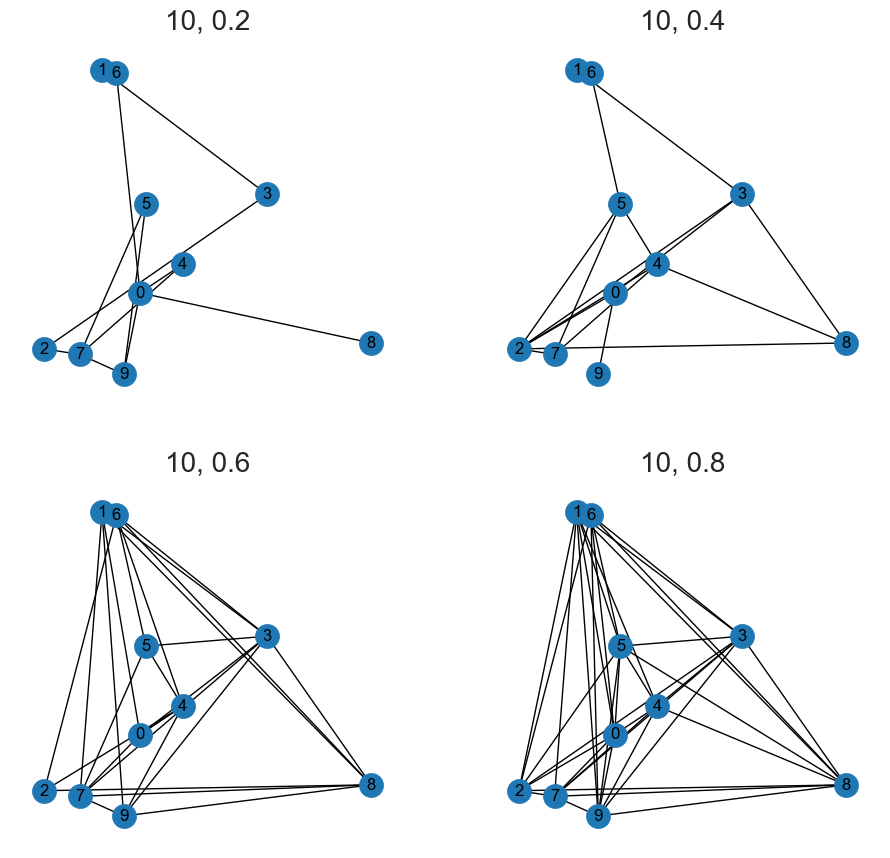

In [93]:
from assignment_1.lib.matplotlib_utils import graph_visualizer

graph_visualizer(experiment_graphs, save=False)

#### Run the experiments with the different algorithms

In [94]:
from assignment_1.lib.experiment_utils import node_experiment

results = {}
for search_algorithm in search_algorithms:
    _, result = node_experiment(experiment_graphs, search_algorithm)

    results[search_algorithm.__name__] = result

In [102]:
from math import inf


labels = []
time_taken = []
path_length = []

for algorithm_index, individual_result in enumerate(results.values()):
    for i, (label, result) in enumerate(individual_result.items()):
        # print(result)
        for key in result.keys():
            labels.append([algorithm_index, f"{search_algorithms[algorithm_index].__name__} - {label} - {key}"])
        time_taken.extend(list(round(time, 3) for time, path in result.values()))
        path_length.extend(list(len(path) if path else 40 for time, path in result.values()))

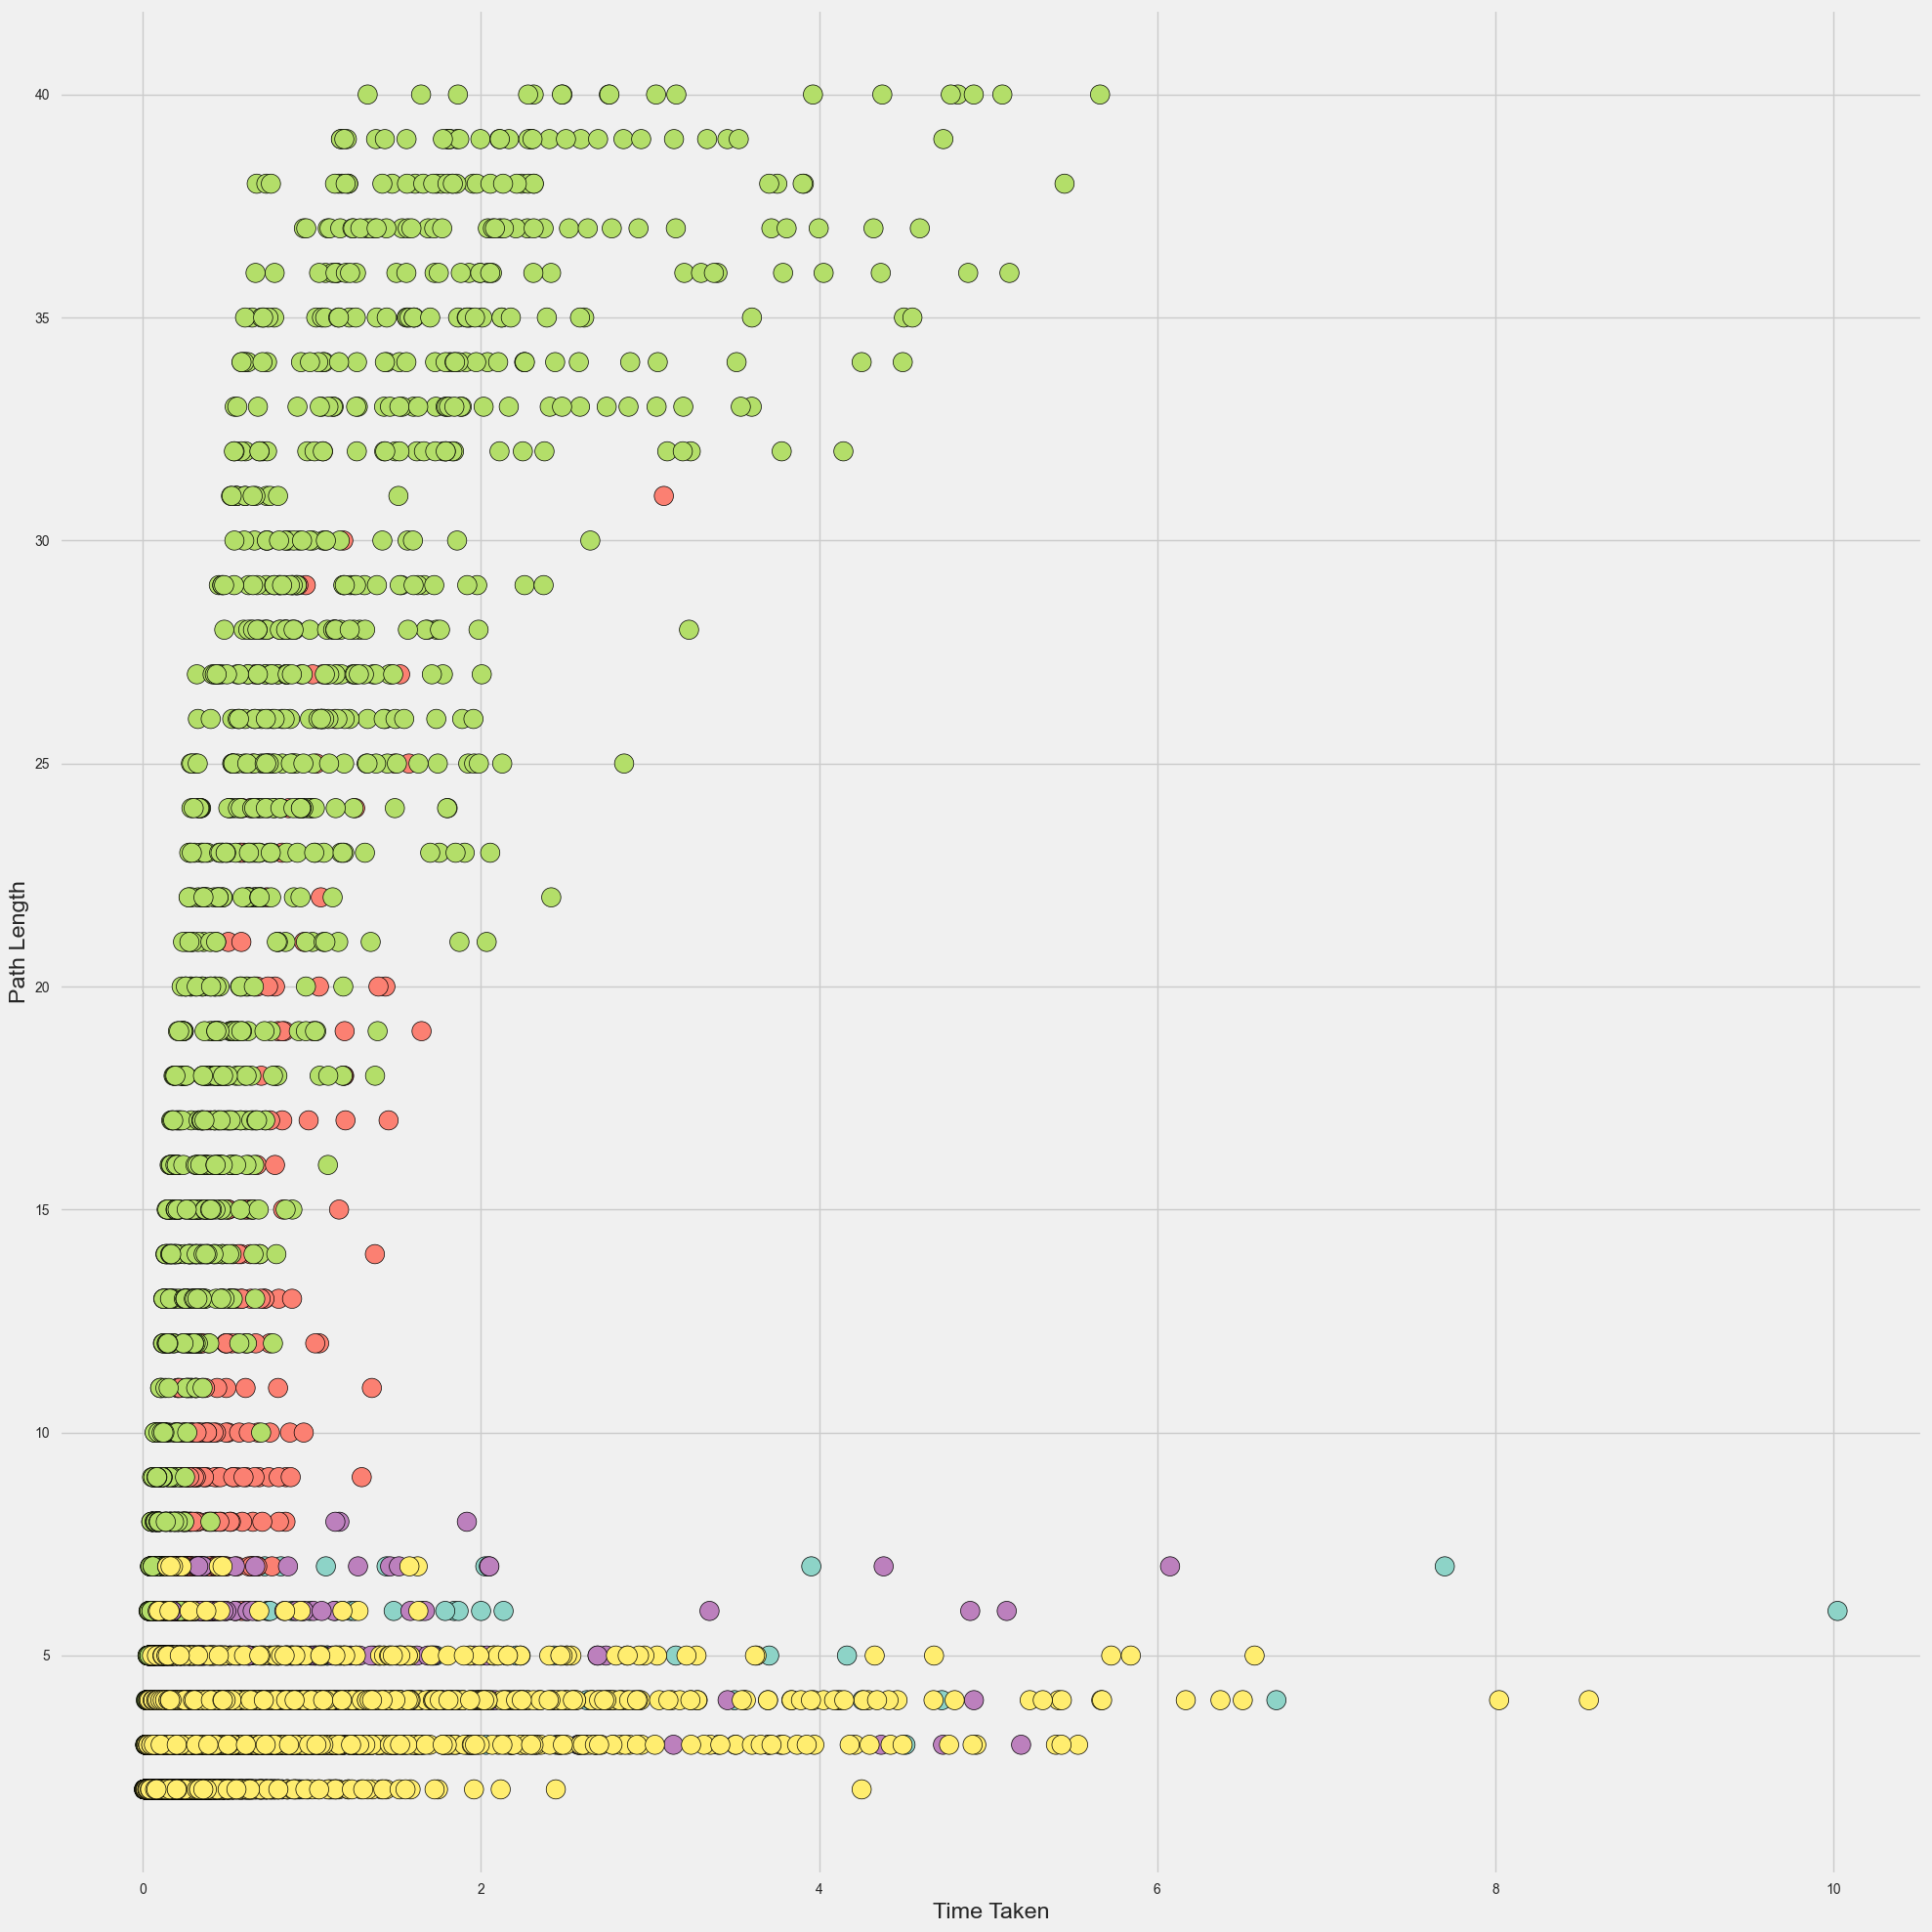

In [111]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

names = []
colors = []
for color, name in labels:
    names.append(name)
    colors.append(color)

plt.style.use("fivethirtyeight")

plt.figure(figsize=(20, 20))
plt.scatter(time_taken, path_length, s=200, c=colors, cmap='Set3', edgecolor='black', alpha=1)
# cbar = plt.colorbar()

# cbar.set_label('Algorithms')

plt.ylabel("Path Length")
plt.xlabel("Time Taken")
plt.tight_layout()

plt.show()